<a href="https://colab.research.google.com/github/zhangxs131/Machine_learning_notebook/blob/main/knn_dating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN

k邻近算法 ，分类算法，每次计算其他已知类别点到预测点的距离，选择k个最近的点，选择其中标签类别最多的作为该点的类别

数据集：海伦约会数据集 https://raw.githubusercontent.com/Jack-Cherish/Machine-Learning/master/kNN/2.%E6%B5%B7%E4%BC%A6%E7%BA%A6%E4%BC%9A/datingTestSet.txt

In [ ]:
#下载数据集
!wget https://raw.githubusercontent.com/Jack-Cherish/Machine-Learning/master/kNN/2.%E6%B5%B7%E4%BC%A6%E7%BA%A6%E4%BC%9A/datingTestSet.txt

--2022-04-28 06:55:02--  https://raw.githubusercontent.com/Jack-Cherish/Machine-Learning/master/kNN/2.%E6%B5%B7%E4%BC%A6%E7%BA%A6%E4%BC%9A/datingTestSet.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34725 (34K) [text/plain]
Saving to: ‘datingTestSet.txt.1’

datingTestSet.txt.1 100%[===================>]  33.91K  --.-KB/s    in 0s      

2022-04-28 06:55:02 (107 MB/s) - ‘datingTestSet.txt.1’ saved [34725/34725]



In [ ]:
#读取数据，得到特征矩阵，和label数组

import numpy as np

def file2matrix(filename):
  with open(filename,'r') as f:
    content=f.readlines()

  features=np.zeros((len(content),3))
  labels=[]
  for id,i in enumerate(content):
    t=i.split('\t')
    features[id,:]=[float(d) for d in t[:-1]]
    labels.append(t[-1])

  label2id={v:k for k,v in enumerate(list(set(labels)))}
  labels=[label2id[i] for i in labels]
  return features,labels,label2id

features,labels,label2id=file2matrix('datingTestSet.txt')

TypeError: ignored

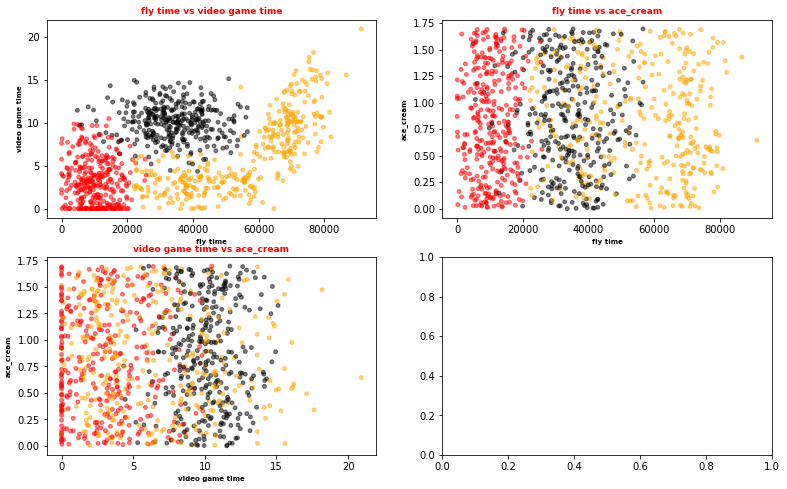

In [ ]:
#可视化数据
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def show_data(features,labels,id2label):
  fig,axs=plt.subplots(2,2,figsize=(13,8))

  length=len(labels)
  colors=['black','orange','red']
  label_color=[colors[i] for i in labels]

  #散点图
  axs[0][0].scatter(x=features[:,0],y=features[:,1],color=label_color,s=15,alpha=0.5)
  title=axs[0][0].set_title('fly time vs video game time')
  xlabel=axs[0][0].set_xlabel('fly time')
  ylabel=axs[0][0].set_ylabel('video game time')
  plt.setp(title, size=9, weight='bold', color='red') 
  plt.setp(xlabel, size=7, weight='bold', color='black') 
  plt.setp(ylabel, size=7, weight='bold', color='black')
 

  axs[0][1].scatter(x=features[:,0],y=features[:,2],color=label_color,s=15,alpha=0.5)
  title=axs[0][1].set_title('fly time vs ace_cream')
  xlabel=axs[0][1].set_xlabel('fly time')
  ylabel=axs[0][1].set_ylabel('ace_cream')
  plt.setp(title, size=9, weight='bold', color='red') 
  plt.setp(xlabel, size=7, weight='bold', color='black') 
  plt.setp(ylabel, size=7, weight='bold', color='black')

  axs[1][0].scatter(x=features[:,1],y=features[:,2],color=label_color,s=15,alpha=0.5)
  title=axs[1][0].set_title('video game time vs ace_cream')
  xlabel=axs[1][0].set_xlabel('video game time')
  ylabel=axs[1][0].set_ylabel('ace_cream')
  plt.setp(title, size=9, weight='bold', color='red') 
  plt.setp(xlabel, size=7, weight='bold', color='black') 
  plt.setp(ylabel, size=7, weight='bold', color='black')

  #设置图例
  lines=[]
  for i in range(3):
    lines.append(mlines.Line2D([],[],color=colors[i],marker='.',markersize=6,label=id2label[i]))
  
  axs[0][0].legend(handles=lines)
  axs[0][1].legend(handles=lines)
  axs[1][0].legend(handles=lines)

  plt.show()




id2label={v:k for k,v in label2id.items()}
show_data(features,labels,id2label)

通过上面图，女主比较喜欢玩video game很多，而飞行时间适中的人，应该就是很闲的人吧。

In [ ]:
#数据预处理
#如果每类特征重要程度相同，则进行归一化，值域到0-1之间

def autoNorm(dataset):
  minval=dataset.min(0)
  maxval=dataset.max(0)

  range=maxval-minval

  norm_dataset=np.zeros(np.shape(dataset))
  m=dataset.shape[0]

  norm_dataset=(dataset-np.tile(minval,(m,1))) / np.tile(range,(m,1))

  return norm_dataset,minval,range

normed_features,minval,range_t=autoNorm(features)
normed_features[:3]

In [ ]:
#KNN算法实现

def classify(inX,dataset,labels,k):
  length=dataset.shape[0]
  diffMat=((np.tile(inX,(length,1))-dataset)**2).sum(axis=1) #计算平方和 
  distance=diffMat**0.5 #距离
  sorted=distance.argsort()

  class_count={}
  max=1
  max_label=labels[sorted[0]]
  for i in range(k):
    if sorted[i] not in class_count:
      class_count[sorted[i]]=1
    else:
      class_count[sorted[i]]+=1
      if class_count[sorted[i]]>max:
        max=class_count[sorted[i]]
        max_label=labels[sorted[i]]
  
  return max_label

def predict(test_data,true_label,train_data,labels,k):
  errorcount=0


  for i in range(50):
  #for i in range(test_data.shape[0]):
    result=classify(test_data[i,:],train_data,labels,k)
    print(result)
    print('分类结果：{}，真实类别：{}'.format(id2label[result],id2label[true_label[i]]))
    if result!=true_label[i]:
      errorcount+=1
  print('错误率:{}'.format(errorcount/float(len(test_data)*100)))
  

#划分训练集和测试集
test_ratio=0.05
m=int(test_ratio*len(normed_features))
test_data,train_data=normed_features[:m,:],normed_features[m:,]
test_labels,train_labels=labels[:m],labels[m:]


predict(test_data,test_labels,train_data,train_labels,k=5)